In [444]:
import pandas as pd 
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split,cross_val_score,cross_val_predict
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error


In [445]:
df=pd.read_csv("StudentsPerformance.csv")

In [446]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145 entries, 0 to 144
Data columns (total 33 columns):
 #   Column                                                             Non-Null Count  Dtype  
---  ------                                                             --------------  -----  
 0   STUDENT ID                                                         145 non-null    object 
 1   Student Age                                                        145 non-null    int64  
 2   Sex                                                                145 non-null    int64  
 3   Graduated high-school type                                         140 non-null    float64
 4   Scholarship type                                                   144 non-null    float64
 5   Additional work                                                    144 non-null    float64
 6   Regular artistic or sports activity                                145 non-null    int64  
 7   Do you have a partner     

In [447]:
df.head(1)

,STUDENT ID,Student Age,Sex,Graduated high-school type,Scholarship type,Additional work,Regular artistic or sports activity,Do you have a partner,Total salary if available,Transportation to the university,...,Preparation to midterm exams 1,Preparation to midterm exams 2,Taking notes in classes,Listening in classes,Discussion improves my interest and success in the course,Flip-classroom,Cumulative grade point average in the last semester (/4.00),Expected Cumulative grade point average in the graduation (/4.00),COURSE ID,GRADE
0,STUDENT1,0,2,NaN,3.0,1.0,2,2,1.0,1,...,1,1,3,2,1,2,1,1,1,1


In [448]:
df.drop("Number of sisters/brothers",axis=1,inplace=True)


In [449]:
df.drop("Do you have a partner",axis=1,inplace=True)
df.drop("Total salary if available",axis=1,inplace=True)
df.drop("Accommodation type in Cyprus",axis=1,inplace=True)
df.drop("Mother’s occupation",axis=1,inplace=True)
df.drop("Father’s occupation",axis=1,inplace=True)
df.drop("Reading frequency.1",axis=1,inplace=True)
df.drop("Flip-classroom",axis=1,inplace=True)

In [450]:
df.drop("COURSE ID",axis=1,inplace=True)
df.drop("Preparation to midterm exams 2",axis=1,inplace=True)
df.drop("Expected Cumulative grade point average in the graduation (/4.00)",axis=1,inplace=True)
df.drop("Discussion improves my interest and success in the course",axis=1,inplace=True)
df.drop("Graduated high-school type",axis=1,inplace=True)
df.drop("Additional work",axis=1,inplace=True)


In [451]:
df.head(1)

,STUDENT ID,Student Age,Sex,Scholarship type,Regular artistic or sports activity,Transportation to the university,Mother’s education,Father’s education,Parental status,Weekly study hours,Reading frequency,Attendance to the seminars/conferences related to the department,Impact of your projects/activities on your success,Attendance to classes,Preparation to midterm exams 1,Taking notes in classes,Listening in classes,Cumulative grade point average in the last semester (/4.00),GRADE
0,STUDENT1,0,2,3.0,2,1,1,2,1.0,3,2,1,1,1,1,3,2,1,1


In [452]:
df.isnull().sum()

STUDENT ID                                                          0
Student Age                                                         0
Sex                                                                 0
Scholarship type                                                    1
Regular artistic or sports activity                                 0
Transportation to the university                                    0
Mother’s education                                                  0
Father’s education                                                  0
Parental status                                                     1
Weekly study hours                                                  0
Reading frequency                                                   0
Attendance to the seminars/conferences related to the department    0
Impact of your projects/activities on your success                  0
Attendance to classes                                               0
Preparation to midte

In [453]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145 entries, 0 to 144
Data columns (total 19 columns):
 #   Column                                                            Non-Null Count  Dtype  
---  ------                                                            --------------  -----  
 0   STUDENT ID                                                        145 non-null    object 
 1   Student Age                                                       145 non-null    int64  
 2   Sex                                                               145 non-null    int64  
 3   Scholarship type                                                  144 non-null    float64
 4   Regular artistic or sports activity                               145 non-null    int64  
 5   Transportation to the university                                  145 non-null    int64  
 6   Mother’s education                                                145 non-null    int64  
 7   Father’s education                 

In [454]:
missing_columns=df.isnull().sum()>0
for col in missing_columns.index:
    if df[col].dtype=="object":
        df[col].fillna(df[col].mode()[0],inplace=True)
    else:
        df[col].fillna(df[col].mean(),inplace=True)

/var/folders/1p/wjjmstx57b73dwzmvlpmj7jr0000gn/T/ipykernel_55612/1763973514.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0],inplace=True)
/var/folders/1p/wjjmstx57b73dwzmvlpmj7jr0000gn/T/ipykernel_55612/1763973514.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always

In [455]:
df.isnull().sum()

STUDENT ID                                                          0
Student Age                                                         0
Sex                                                                 0
Scholarship type                                                    0
Regular artistic or sports activity                                 0
Transportation to the university                                    0
Mother’s education                                                  0
Father’s education                                                  0
Parental status                                                     0
Weekly study hours                                                  0
Reading frequency                                                   0
Attendance to the seminars/conferences related to the department    0
Impact of your projects/activities on your success                  0
Attendance to classes                                               0
Preparation to midte

In [456]:
categorical_col=df.select_dtypes(include=['object','category']).columns

In [457]:
categorical_col

Index(['STUDENT ID'], dtype='object')

In [458]:
cardinality=df[categorical_col].nunique()

In [459]:
df['STUDENT ID'].value_counts()

STUDENT ID
STUDENT1      1
STUDENT74     1
STUDENT94     1
STUDENT95     1
STUDENT96     1
             ..
STUDENT50     1
STUDENT51     1
STUDENT52     1
STUDENT53     1
STUDENT145    1
Name: count, Length: 145, dtype: int64

In [460]:
cardinality

STUDENT ID    145
dtype: int64

In [461]:
label_encoder=LabelEncoder()

In [462]:
df['STUDENT ID']=label_encoder.fit_transform(df['STUDENT ID'])

In [463]:
categorical_col=df.select_dtypes(include=['object','category']).columns

In [464]:
cardinality=df[categorical_col].nunique()

In [465]:
df = df.drop(columns=categorical_col)

In [466]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145 entries, 0 to 144
Data columns (total 19 columns):
 #   Column                                                            Non-Null Count  Dtype  
---  ------                                                            --------------  -----  
 0   STUDENT ID                                                        145 non-null    int64  
 1   Student Age                                                       145 non-null    int64  
 2   Sex                                                               145 non-null    int64  
 3   Scholarship type                                                  145 non-null    float64
 4   Regular artistic or sports activity                               145 non-null    int64  
 5   Transportation to the university                                  145 non-null    int64  
 6   Mother’s education                                                145 non-null    int64  
 7   Father’s education                 

In [467]:
cardinality

Series([], dtype: float64)

In [468]:
df=df.astype(int)

In [469]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145 entries, 0 to 144
Data columns (total 19 columns):
 #   Column                                                            Non-Null Count  Dtype
---  ------                                                            --------------  -----
 0   STUDENT ID                                                        145 non-null    int64
 1   Student Age                                                       145 non-null    int64
 2   Sex                                                               145 non-null    int64
 3   Scholarship type                                                  145 non-null    int64
 4   Regular artistic or sports activity                               145 non-null    int64
 5   Transportation to the university                                  145 non-null    int64
 6   Mother’s education                                                145 non-null    int64
 7   Father’s education                                   

In [470]:
x=df.drop(columns=["GRADE"])
y=df["GRADE"]

In [471]:
x_train,x_temp,y_train,y_temp=train_test_split(x,y,test_size=0.3,random_state=42)

x_val,x_test,y_val,y_test=train_test_split(x_temp,y_temp,test_size=0.5,random_state=42)

In [472]:
model = DecisionTreeRegressor(random_state=42)
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"mse:{mse}")
print(f"r2:{r2}")

mse:4.954545454545454
r2:-0.4105882352941179


In [473]:
model=LinearRegression()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"mse:{mse}")
print(f"r2:{r2}")

mse:3.935435895180076
r2:-0.12044174898068061


In [474]:
model=RandomForestRegressor(n_estimators=100,random_state=42)
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"mse:{mse}")
print(f"r2:{r2}")

mse:1.7157000000000004
r2:0.5115301176470586


In [475]:
model=KNeighborsRegressor()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"mse:{mse}")
print(f"r2:{r2}")



mse:1.7290909090909088
r2:0.5077176470588235


# Feature Engineering and Mutual Information 

In [505]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.preprocessing import LabelEncoder
df=pd.read_csv("StudentsPerformance.csv")

In [506]:
df.head()

,STUDENT ID,Student Age,Sex,Graduated high-school type,Scholarship type,Additional work,Regular artistic or sports activity,Do you have a partner,Total salary if available,Transportation to the university,...,Preparation to midterm exams 1,Preparation to midterm exams 2,Taking notes in classes,Listening in classes,Discussion improves my interest and success in the course,Flip-classroom,Cumulative grade point average in the last semester (/4.00),Expected Cumulative grade point average in the graduation (/4.00),COURSE ID,GRADE
0,STUDENT1,0,2,NaN,3.0,1.0,2,2,1.0,1,...,1,1,3,2,1,2,1,1,1,1
1,STUDENT2,2,2,3.0,3.0,1.0,2,2,1.0,1,...,1,1,3,2,3,2,2,3,1,1
2,STUDENT3,2,2,2.0,3.0,NaN,2,2,2.0,4,...,1,1,2,2,1,1,2,2,1,1
3,STUDENT4,1,1,1.0,3.0,1.0,2,1,2.0,1,...,1,2,3,2,2,1,3,2,1,1
4,STUDENT5,2,2,1.0,3.0,2.0,2,1,3.0,1,...,2,1,2,2,2,1,2,2,1,1


In [507]:
df.drop("Do you have a partner",axis=1,inplace=True)
df.drop("Total salary if available",axis=1,inplace=True)
df.drop("Accommodation type in Cyprus",axis=1,inplace=True)
df.drop("Mother’s occupation",axis=1,inplace=True)
df.drop("Father’s occupation",axis=1,inplace=True)
df.drop("Reading frequency.1",axis=1,inplace=True)
df.drop("Flip-classroom",axis=1,inplace=True)
df.drop("Number of sisters/brothers",axis=1,inplace=True)
df.drop("COURSE ID",axis=1,inplace=True)
df.drop("Preparation to midterm exams 2",axis=1,inplace=True)
df.drop("Expected Cumulative grade point average in the graduation (/4.00)",axis=1,inplace=True)
df.drop("Discussion improves my interest and success in the course",axis=1,inplace=True)
df.drop("Graduated high-school type",axis=1,inplace=True)
df.drop("Additional work",axis=1,inplace=True)

In [508]:
df['Revenue_Per_Listening'] = df['Attendance to classes'] / df['Listening in classes']
df['Revenue_Per_Taking notes'] = df['Listening in classes'] / df['Taking notes in classes']
df['Revenue_Per_study hours'] = df['Attendance to classes'] / df['Weekly study hours']
df['Revenue_Per_Scholarship'] = df['Listening in classes'] / df['Scholarship type']
df['Revenue_Per_Parental status'] = df['Parental status'] / df['Weekly study hours']

In [509]:
df.head()

,STUDENT ID,Student Age,Sex,Scholarship type,Regular artistic or sports activity,Transportation to the university,Mother’s education,Father’s education,Parental status,Weekly study hours,...,Preparation to midterm exams 1,Taking notes in classes,Listening in classes,Cumulative grade point average in the last semester (/4.00),GRADE,Revenue_Per_Listening,Revenue_Per_Taking notes,Revenue_Per_study hours,Revenue_Per_Scholarship,Revenue_Per_Parental status
0,STUDENT1,0,2,3.0,2,1,1,2,1.0,3,...,1,3,2,1,1,0.5,0.666667,0.333333,0.666667,0.333333
1,STUDENT2,2,2,3.0,2,1,2,3,1.0,2,...,1,3,2,2,1,0.5,0.666667,0.500000,0.666667,0.500000
2,STUDENT3,2,2,3.0,2,4,2,2,NaN,2,...,1,2,2,2,1,0.5,1.000000,0.500000,0.666667,NaN
3,STUDENT4,1,1,3.0,2,1,1,2,1.0,3,...,1,3,2,3,1,0.5,0.666667,0.333333,0.666667,0.333333
4,STUDENT5,2,2,3.0,2,1,3,3,1.0,2,...,2,2,2,2,1,0.5,1.000000,0.500000,0.666667,0.500000


In [510]:
df[['Revenue_Per_Parental status', 'GRADE']] = df[['GRADE', 'Revenue_Per_Parental status']]

In [511]:
df.head(1)

,STUDENT ID,Student Age,Sex,Scholarship type,Regular artistic or sports activity,Transportation to the university,Mother’s education,Father’s education,Parental status,Weekly study hours,...,Preparation to midterm exams 1,Taking notes in classes,Listening in classes,Cumulative grade point average in the last semester (/4.00),GRADE,Revenue_Per_Listening,Revenue_Per_Taking notes,Revenue_Per_study hours,Revenue_Per_Scholarship,Revenue_Per_Parental status
0,STUDENT1,0,2,3.0,2,1,1,2,1.0,3,...,1,3,2,1,0.333333,0.5,0.666667,0.333333,0.666667,1


In [512]:
df.columns = df.columns.str.replace('GRADE', 'Temp').str.replace('Revenue_Per_Parental status', 'GRADE').str.replace('Temp', 'Revenue_Per_Parental status')

In [513]:
df.head(1)

,STUDENT ID,Student Age,Sex,Scholarship type,Regular artistic or sports activity,Transportation to the university,Mother’s education,Father’s education,Parental status,Weekly study hours,...,Preparation to midterm exams 1,Taking notes in classes,Listening in classes,Cumulative grade point average in the last semester (/4.00),Revenue_Per_Parental status,Revenue_Per_Listening,Revenue_Per_Taking notes,Revenue_Per_study hours,Revenue_Per_Scholarship,GRADE
0,STUDENT1,0,2,3.0,2,1,1,2,1.0,3,...,1,3,2,1,0.333333,0.5,0.666667,0.333333,0.666667,1


In [514]:
missing_cols = df.columns[df.isnull().sum() > 0]

for col in missing_cols:
    if df[col].dtype == 'object':
        df[col].fillna(df[col].mode()[0], inplace=True) 
    else: 
        df[col].fillna(df[col].mean(), inplace=True)  

/var/folders/1p/wjjmstx57b73dwzmvlpmj7jr0000gn/T/ipykernel_55612/1656757902.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mean(), inplace=True)


In [515]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145 entries, 0 to 144
Data columns (total 24 columns):
 #   Column                                                            Non-Null Count  Dtype  
---  ------                                                            --------------  -----  
 0   STUDENT ID                                                        145 non-null    object 
 1   Student Age                                                       145 non-null    int64  
 2   Sex                                                               145 non-null    int64  
 3   Scholarship type                                                  145 non-null    float64
 4   Regular artistic or sports activity                               145 non-null    int64  
 5   Transportation to the university                                  145 non-null    int64  
 6   Mother’s education                                                145 non-null    int64  
 7   Father’s education                 

In [516]:
df['STUDENT ID'].value_counts()

STUDENT ID
STUDENT1      1
STUDENT74     1
STUDENT94     1
STUDENT95     1
STUDENT96     1
             ..
STUDENT50     1
STUDENT51     1
STUDENT52     1
STUDENT53     1
STUDENT145    1
Name: count, Length: 145, dtype: int64

In [517]:
unique_values = df['STUDENT ID'].unique()


print(unique_values)

['STUDENT1' 'STUDENT2' 'STUDENT3' 'STUDENT4' 'STUDENT5' 'STUDENT6'
 'STUDENT7' 'STUDENT8' 'STUDENT9' 'STUDENT10' 'STUDENT11' 'STUDENT12'
 'STUDENT13' 'STUDENT14' 'STUDENT15' 'STUDENT16' 'STUDENT17' 'STUDENT18'
 'STUDENT19' 'STUDENT20' 'STUDENT21' 'STUDENT22' 'STUDENT23' 'STUDENT24'
 'STUDENT25' 'STUDENT26' 'STUDENT27' 'STUDENT28' 'STUDENT29' 'STUDENT30'
 'STUDENT31' 'STUDENT32' 'STUDENT33' 'STUDENT34' 'STUDENT35' 'STUDENT36'
 'STUDENT37' 'STUDENT38' 'STUDENT39' 'STUDENT40' 'STUDENT41' 'STUDENT42'
 'STUDENT43' 'STUDENT44' 'STUDENT45' 'STUDENT46' 'STUDENT47' 'STUDENT48'
 'STUDENT49' 'STUDENT50' 'STUDENT51' 'STUDENT52' 'STUDENT53' 'STUDENT54'
 'STUDENT55' 'STUDENT56' 'STUDENT57' 'STUDENT58' 'STUDENT59' 'STUDENT60'
 'STUDENT61' 'STUDENT62' 'STUDENT63' 'STUDENT64' 'STUDENT65' 'STUDENT66'
 'STUDENT67' 'STUDENT68' 'STUDENT69' 'STUDENT70' 'STUDENT71' 'STUDENT72'
 'STUDENT73' 'STUDENT74' 'STUDENT75' 'STUDENT76' 'STUDENT77' 'STUDENT78'
 'STUDENT79' 'STUDENT80' 'STUDENT81' 'STUDENT82' 'STUDENT83'

In [518]:
df.pop('STUDENT ID')

0        STUDENT1
1        STUDENT2
2        STUDENT3
3        STUDENT4
4        STUDENT5
          ...    
140    STUDENT141
141    STUDENT142
142    STUDENT143
143    STUDENT144
144    STUDENT145
Name: STUDENT ID, Length: 145, dtype: object

In [519]:
df.head()

,Student Age,Sex,Scholarship type,Regular artistic or sports activity,Transportation to the university,Mother’s education,Father’s education,Parental status,Weekly study hours,Reading frequency,...,Preparation to midterm exams 1,Taking notes in classes,Listening in classes,Cumulative grade point average in the last semester (/4.00),Revenue_Per_Parental status,Revenue_Per_Listening,Revenue_Per_Taking notes,Revenue_Per_study hours,Revenue_Per_Scholarship,GRADE
0,0,2,3.0,2,1,1,2,1.000000,3,2,...,1,3,2,1,0.333333,0.5,0.666667,0.333333,0.666667,1
1,2,2,3.0,2,1,2,3,1.000000,2,2,...,1,3,2,2,0.500000,0.5,0.666667,0.500000,0.666667,1
2,2,2,3.0,2,4,2,2,1.173611,2,1,...,1,2,2,2,0.635532,0.5,1.000000,0.500000,0.666667,1
3,1,1,3.0,2,1,1,2,1.000000,3,1,...,1,3,2,3,0.333333,0.5,0.666667,0.333333,0.666667,1
4,2,2,3.0,2,1,3,3,1.000000,2,1,...,2,2,2,2,0.500000,0.5,1.000000,0.500000,0.666667,1


In [520]:
from sklearn.preprocessing import LabelEncoder
import pandas as pd

# Assuming df is your DataFrame
label_encoder = LabelEncoder()

# Apply label encoding to all object (categorical) columns
for colname in df.select_dtypes("object"):
    df[colname] = label_encoder.fit_transform(df[colname])

# Check the changes
print(df.head())

   Student Age  Sex  Scholarship type  Regular artistic or sports activity  \
0            0    2               3.0                                    2   
1            2    2               3.0                                    2   
2            2    2               3.0                                    2   
3            1    1               3.0                                    2   
4            2    2               3.0                                    2   

   Transportation to the university  Mother’s education  Father’s education   \
0                                 1                   1                    2   
1                                 1                   2                    3   
2                                 4                   2                    2   
3                                 1                   1                    2   
4                                 1                   3                    3   

   Parental status  Weekly study hours  Reading fr

In [523]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145 entries, 0 to 144
Data columns (total 23 columns):
 #   Column                                                            Non-Null Count  Dtype  
---  ------                                                            --------------  -----  
 0   Student Age                                                       145 non-null    int64  
 1   Sex                                                               145 non-null    int64  
 2   Scholarship type                                                  145 non-null    float64
 3   Regular artistic or sports activity                               145 non-null    int64  
 4   Transportation to the university                                  145 non-null    int64  
 5   Mother’s education                                                145 non-null    int64  
 6   Father’s education                                                145 non-null    int64  
 7   Parental status                    

In [530]:
categorical_col=df.select_dtypes(include=['object','category']).columns

In [531]:
categorical_col

Index([], dtype='object')

In [532]:
cardinality=df[categorical_col].nunique()

In [533]:
cardinality

Series([], dtype: float64)

In [535]:
df['Revenue_Per_Scholarship'] = df['Revenue_Per_Scholarship'].astype(int)


In [538]:
df['Scholarship type'] = df['Scholarship type'].astype(int)


In [539]:
df['Parental status'] = df['Parental status'].astype(int)


In [540]:
df['Revenue_Per_Parental status'] = df['Revenue_Per_Parental status'].astype(int)


In [544]:
from sklearn.preprocessing import LabelEncoder
label_encoder=LabelEncoder()
df['Revenue_Per_Listening']=label_encoder.fit_transform(df['Revenue_Per_Listening'])

In [545]:
categorical_col=df.select_dtypes(include=['object','category']).columns

In [546]:
cardinality=df[categorical_col].nunique()

In [542]:
df['Revenue_Per_Taking notes'] = df['Revenue_Per_Taking notes'].astype(int)

In [548]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145 entries, 0 to 144
Data columns (total 23 columns):
 #   Column                                                            Non-Null Count  Dtype  
---  ------                                                            --------------  -----  
 0   Student Age                                                       145 non-null    int64  
 1   Sex                                                               145 non-null    int64  
 2   Scholarship type                                                  145 non-null    int64  
 3   Regular artistic or sports activity                               145 non-null    int64  
 4   Transportation to the university                                  145 non-null    int64  
 5   Mother’s education                                                145 non-null    int64  
 6   Father’s education                                                145 non-null    int64  
 7   Parental status                    

In [549]:
df=df.astype(int)

In [550]:
from sklearn.feature_selection import mutual_info_regression
import pandas as pd

X = df.copy()
y = X.pop("GRADE")

In [551]:
mi_scores = mutual_info_regression(X, y)

In [552]:
mi_scores

array([0.09828771, 0.08681353, 0.05394651, 0.        , 0.        ,
       0.06725288, 0.        , 0.        , 0.04806616, 0.13627312,
       0.        , 0.        , 0.00167165, 0.        , 0.01477703,
       0.07634511, 0.22820556, 0.        , 0.        , 0.        ,
       0.        , 0.13646535])

In [553]:
# Convert to DataFrame for better readability
mi_scores_df = pd.DataFrame(mi_scores, index=X.columns, columns=['MI Score'])
mi_scores_df = mi_scores_df.sort_values(by='MI Score', ascending=False)

# Print MI scores
print(mi_scores_df)

                                                    MI Score
Cumulative grade point average in the last seme...  0.228206
Revenue_Per_Scholarship                             0.136465
Reading frequency                                   0.136273
Student Age                                         0.098288
Sex                                                 0.086814
Listening in classes                                0.076345
Mother’s education                                  0.067253
Scholarship type                                    0.053947
Weekly study hours                                  0.048066
Taking notes in classes                             0.014777
Attendance to classes                               0.001672
Transportation to the university                    0.000000
Revenue_Per_study hours                             0.000000
Revenue_Per_Taking notes                            0.000000
Revenue_Per_Listening                               0.000000
Revenue_Per_Parental sta

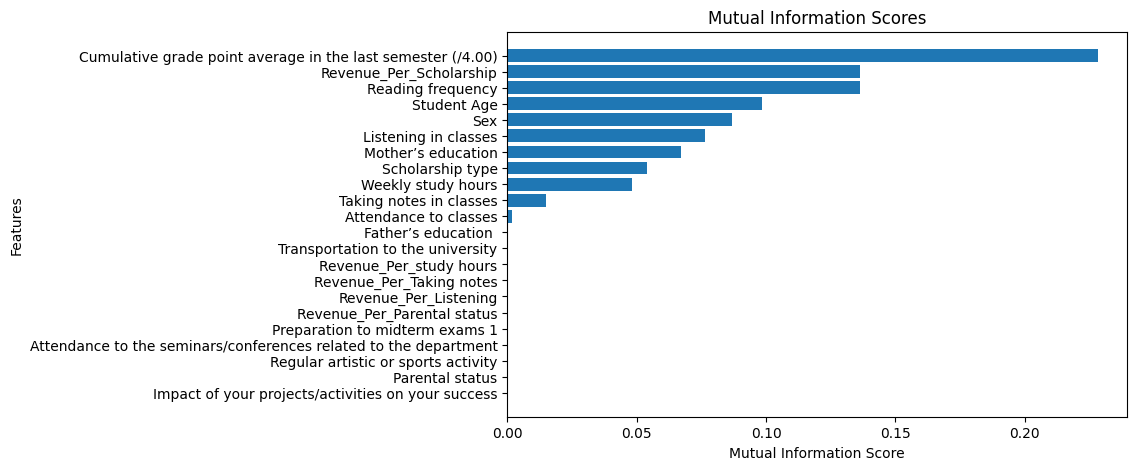

In [554]:
# Define the function to plot Mutual Information scores
import numpy as np
def plot_mi_scores(scores):
    scores = scores.sort_values(ascending=True)  # Sort values for horizontal bar chart
    width = np.arange(len(scores))  # Generate positions for bars
    ticks = list(scores.index)  # List of feature names for ticks
    
    # Plotting
    plt.barh(width, scores)
    plt.yticks(width, ticks)  # Set the y-axis ticks to the feature names
    plt.title("Mutual Information Scores")
    plt.xlabel("Mutual Information Score")
    plt.ylabel("Features")
    plt.show()

# Plot the MI scores
plt.figure(dpi=100, figsize=(8, 5))  # Set figure size and resolution
plot_mi_scores(mi_scores_df['MI Score'])  # Pass only MI Score column to plot function

# Scaling

In [566]:
X = df.drop(columns=["GRADE"])  # Mustaqil o'zgaruvchilar
y = df["GRADE"]  # Maqsadli o'zgaruvchi

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler_x=StandardScaler()
scaler_y=StandardScaler()

x_train_scaled=scaler_x.fit_transform(x_train)
x_test_scaled=scaler_x.fit_transform(x_test)

y_train_scaled=scaler_y.fit_transform(y_train.values.reshape(-1,1))
y_test_scaled=scaler_y.fit_transform(y_test.values.reshape(-1,1))

In [567]:
model = DecisionTreeRegressor(random_state=42)
model.fit(x_train_scaled, y_train_scaled)


DecisionTreeRegressor(random_state=42)

In [568]:

y_pred_scaled = model.predict(x_test_scaled)



In [569]:
mse = mean_squared_error(y_test_scaled, y_pred_scaled)
r2 = r2_score(y_test_scaled, y_pred_scaled)

print(f"mse:{mse}")
print(f"r2:{r2}")

mse:1.2840042942146643
r2:-0.28400429421466433


In [571]:
model=LinearRegression()
model.fit(x_train_scaled, y_train_scaled)



LinearRegression()

In [572]:
y_pred = model.predict(x_test_scaled)



In [573]:
mse = mean_squared_error(y_test_scaled, y_pred_scaled)
r2 = r2_score(y_test_scaled, y_pred_scaled)

print(f"mse:{mse}")
print(f"r2:{r2}")

mse:1.2840042942146643
r2:-0.28400429421466433


In [574]:
model=RandomForestRegressor(n_estimators=100,random_state=42)
model.fit(x_train_scaled, y_train_scaled)


/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestRegressor(random_state=42)

In [575]:

y_pred = model.predict(x_test_scaled)

mse = mean_squared_error(y_test_scaled, y_pred_scaled)
r2 = r2_score(y_test_scaled, y_pred_scaled)

print(f"mse:{mse}")
print(f"r2:{r2}")

mse:1.2840042942146643
r2:-0.28400429421466433


In [576]:
model=KNeighborsRegressor()
model.fit(x_train_scaled, y_train_scaled)



KNeighborsRegressor()

In [577]:
y_pred = model.predict(x_test_scaled)

mse = mean_squared_error(y_test_scaled, y_pred_scaled)
r2 = r2_score(y_test_scaled, y_pred_scaled)

print(f"mse:{mse}")
print(f"r2:{r2}")

mse:1.2840042942146643
r2:-0.28400429421466433


# Hyperparameter tuning

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

# Model
model = RandomForestRegressor()

# Giperparametrlar to‘plami
param_grid = {
    'n_estimators': [10, 50, 100],
    'max_depth': [5, 10, 20],
    'min_samples_split': [2, 5, 10]
}

# GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Eng yaxshi parametrlar va natija
print("Eng yaxshi parametrlar:", grid_search.best_params_)
print("Eng yaxshi aniqlik:", grid_search.best_score_)


In [585]:
from sklearn.linear_model import Ridge,Lasso
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_squared_error, r2_score


In [586]:
param_dist_ridge = {'alpha': np.logspace(-6, 6, 13)}  # Regulizasyon kuchi
ridge = Ridge()
random_search_ridge = RandomizedSearchCV(
    ridge, 
    param_distributions=param_dist_ridge, 
    n_iter=10, 
    cv=5, 
    scoring='neg_mean_squared_error', 
    random_state=42
)
random_search_ridge.fit(x_train_scaled, y_train)

best_ridge = random_search_ridge.best_estimator_
y_pred_ridge = best_ridge.predict(x_test_scaled)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)

print("Best parameters for Ridge Regression:", random_search_ridge.best_params_)
print("Ridge Regression MSE:", mse_ridge)
print("Ridge Regression R2:", r2_ridge)


Best parameters for Ridge Regression: {'alpha': np.float64(10.0)}
Ridge Regression MSE: 4.741687722844701
Ridge Regression R2: -0.04033402441379641


In [587]:
param_dist_lasso = {'alpha': np.logspace(-6, 6, 13)}  # Regulizasyon kuchi
lasso = Lasso()
random_search_lasso = RandomizedSearchCV(
    lasso, 
    param_distributions=param_dist_lasso, 
    n_iter=10, 
    cv=5, 
    scoring='neg_mean_squared_error', 
    random_state=42
)
random_search_lasso.fit(x_train_scaled, y_train)

best_lasso = random_search_lasso.best_estimator_
y_pred_lasso = best_lasso.predict(x_test_scaled)
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)

print("Best parameters for Lasso Regression:", random_search_lasso.best_params_)
print("Lasso Regression MSE:", mse_ridge)
print("Lasso Regression R2:", r2_ridge)

Best parameters for Lasso Regression: {'alpha': np.float64(0.1)}
Lasso Regression MSE: 4.741687722844701
Lasso Regression R2: -0.04033402441379641


In [591]:
param_dist_dt = {
    'max_depth': [3, 5, 7, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2', None]
}

dt = DecisionTreeRegressor(random_state=42)
random_search_dt = RandomizedSearchCV(
    dt, 
    param_distributions=param_dist_dt, 
    n_iter=10, 
    cv=5, 
    scoring='neg_mean_squared_error', 
    random_state=42
)
random_search_dt.fit(x_train, y_train)

best_dt = random_search_dt.best_estimator_
y_pred_dt = best_dt.predict(x_test)
mse_dt = mean_squared_error(y_test, y_pred_dt)
r2_dt = r2_score(y_test, y_pred_dt)

print("Best parameters for Decision Tree:", random_search_dt.best_params_)
print("Decision Tree MSE:", mse_dt)
print("Decision Tree R2:", r2_dt)

{'min_samples_split': 10, 'min_samples_leaf': 2, 'max_features': None, 'max_depth': 5}


Best parameters for Decision Tree: {'min_samples_split': 10, 'min_samples_leaf': 2, 'max_features': None, 'max_depth': 5}
Decision Tree MSE: 4.777170818874688
Decision Tree R2: -0.04811907358810008


/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
20 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
    ~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/base.py", line 1467, in wrapper
    estimator._validate_params()
    ~~~~~~~~~~~~~~~~~~~~~

{'min_samples_split': 10,
 'min_samples_leaf': 2,
 'max_features': None,
 'max_depth': 5}

In [593]:
param_dist_knn = {
    'n_neighbors': [3, 5, 7, 10, 15],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'chebyshev', 'minkowski']
}
knn = KNeighborsRegressor()
random_search_knn = RandomizedSearchCV(
    estimator=knn,
    param_distributions=param_dist_knn,
    n_iter=10,
    cv=5,
    scoring='neg_mean_squared_error',
    random_state=42
)
random_search_knn.fit(x_train, y_train)
print("Best parameters for KNN:", random_search_knn.best_params_)
best_knn = random_search_knn.best_estimator_
y_pred_knn = best_knn.predict(x_test)
mse_knn = mean_squared_error(y_test, y_pred_knn)
r2_knn = r2_score(y_test, y_pred_knn)


print("KNN MSE:", mse_knn)
print("KNN R2:", r2_knn)


Best parameters for KNN: {'weights': 'distance', 'n_neighbors': 15, 'metric': 'minkowski'}
KNN MSE: 4.395132548551123
KNN R2: 0.03570074637409637


In [595]:
param_dist_rf = {
    'n_estimators': [10, 50, 100, 200],
    'max_depth': [3, 5, 7, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2', None]
}
rf = RandomForestRegressor(random_state=42)
random_search_rf = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_dist_rf,
    n_iter=10,
    cv=5,
    scoring='neg_mean_squared_error',
    random_state=42
)
random_search_rf.fit(x_train, y_train)
print("Best parameters for Random Forest:", random_search_rf.best_params_)
best_rf = random_search_rf.best_estimator_
y_pred_rf = best_rf.predict(x_test)
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)
print("Random Forest MSE:", mse_rf)
print("Random Forest R2:", r2_rf)

Best parameters for Random Forest: {'n_estimators': 100, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 5}
Random Forest MSE: 4.223427855447351
Random Forest R2: 0.07337303624817859


/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
20 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
    ~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/base.py", line 1467, in wrapper
    estimator._validate_params()
    ~~~~~~~~~~~~~~~~~~~~~

In [596]:
param_dist_lr = {
    'n_estimators': [10, 50, 100, 200],
    'max_depth': [3, 5, 7, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2', None]
}
lr = LinearRegression()
random_search_lr = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_dist_lr,
    n_iter=10,
    cv=5,
    scoring='neg_mean_squared_error',
    random_state=42
)
random_search_lr.fit(x_train, y_train)
print("Best parameters for Linear Regression:", random_search_lr.best_params_)
best_lr = random_search_lr.best_estimator_
y_pred_lr = best_lr.predict(x_test)
mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)
print("Linear Regression MSE:", mse_lr)
print("Linear Regression R2:", r2_lr)

Best parameters for Linear Regression: {'n_estimators': 100, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 5}
Linear Regression MSE: 4.223427855447351
Linear Regression R2: 0.07337303624817859


/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
20 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
    ~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/base.py", line 1467, in wrapper
    estimator._validate_params()
    ~~~~~~~~~~~~~~~~~~~~~